**Objective: To expose the best combination for strategy games available in the appstore in order to
get a good user rating (4.0/5.0 and above)**

**Importing all the required libraries**

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

**Importing the dataset**

In [109]:
dataset = pd.read_csv("appstore_games.csv")
dataset.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


**Learning about the state of dataset**


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [111]:
dataset.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


**Number of nan values in each column**

In [112]:
dataset.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [113]:
dataset.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

**Dropping the columns which are useless for our purpose**

In [0]:
dataset = dataset.drop(['URL', 'Subtitle', 'Icon URL', 'Description'], axis = 1)

In [115]:
dataset.head(2)

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


**Dropping all the Entries that has no Average User Rating**

In [0]:
dataset = dataset.dropna(axis=0, subset = ["Average User Rating"])

**Checking number of nan values after drop**

In [117]:
dataset.isna().sum()

ID                                 0
Name                               0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Developer                          0
Age Rating                         0
Languages                         24
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

**Checking number of unique values in each column**

In [118]:
dataset.nunique()

ID                              7488
Name                            7488
Average User Rating                9
User Rating Count               1792
Price                             19
In-app Purchases                2965
Developer                       4275
Age Rating                         4
Languages                        789
Size                            7329
Primary Genre                     21
Genres                           623
Original Release Date           2764
Current Version Release Date    2170
dtype: int64

**Finding the number of entries for different categories in "Primary Genre" column**

In [119]:
dataset["Primary Genre"].value_counts()

Games                7291
Entertainment          92
Education              46
Utilities              44
Sports                 23
Reference              18
Productivity            8
Finance                 8
Book                    5
Lifestyle               4
Social Networking       3
Health & Fitness        3
Music                   3
Stickers                3
Medical                 2
News                    2
Business                2
Travel                  1
Food & Drink            1
Shopping                1
Navigation              1
Name: Primary Genre, dtype: int64

**Plotting entries count for each category in Primary Genre**

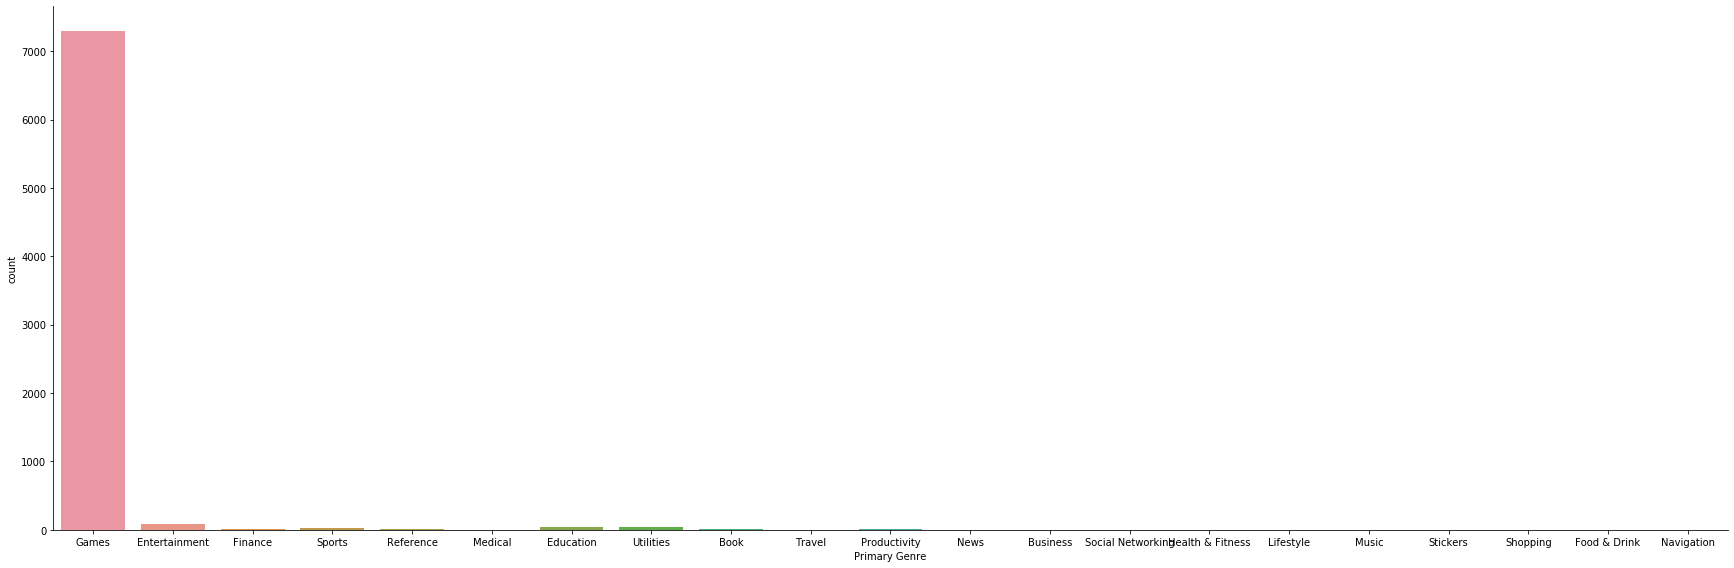

In [120]:
sns.catplot("Primary Genre", data = dataset, kind='count', legend_out=True, height = 8, aspect = 3)

**Plotting categorical entries count of primary Genre without "Games" to see the plot clearly**

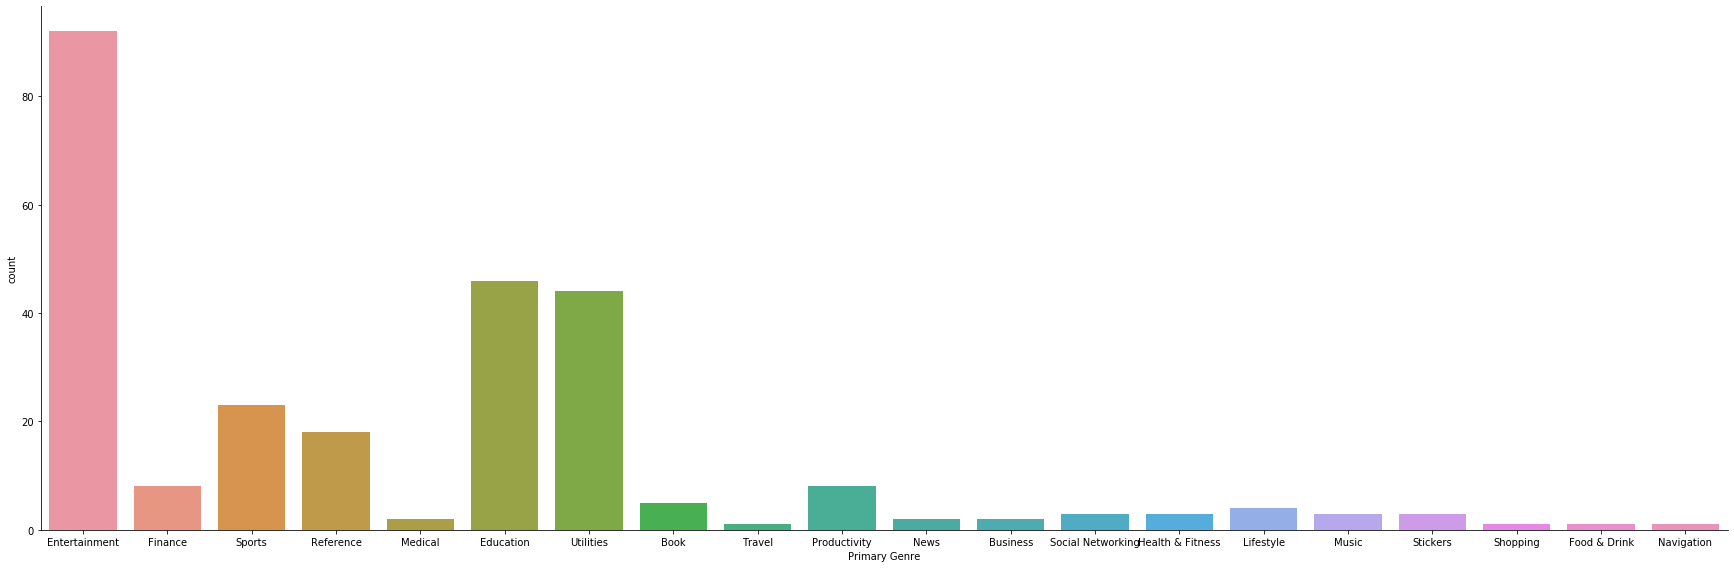

In [121]:
sns.catplot("Primary Genre", data = dataset.loc[dataset["Primary Genre"] != "Games"], kind='count', legend_out=True, height = 8, aspect = 3)

**Making a list of all the sub-genres possible in the dataset**

In [122]:
genres = set()
def extract(gen_string):
  gen_list = gen_string.split(", ")
  genres.update(gen_list)

dataset.apply(lambda row:extract(row["Genres"]), axis=1)
print(genres)

{'News', 'Role Playing', 'Reference', 'Weather', 'Navigation', 'Family', 'Photo & Video', 'Stickers', 'Casual', 'Health & Fitness', 'Board', 'Utilities', 'Simulation', 'Entertainment', 'Emoji & Expressions', 'Racing', 'Social Networking', 'Business', 'Sports', 'Food & Drink', 'Travel', 'Music', 'Gaming', 'Books', 'Action', 'Education', 'Puzzle', 'Adventure', 'Casino', 'Magazines & Newspapers', 'Medical', 'Lifestyle', 'Trivia', 'Productivity', 'Shopping', 'Word', 'Finance', 'Card', 'Strategy', 'Kids & Family', 'Games'}


In [123]:
sub_gen = list(genres)
print(sub_gen)

['News', 'Role Playing', 'Reference', 'Weather', 'Navigation', 'Family', 'Photo & Video', 'Stickers', 'Casual', 'Health & Fitness', 'Board', 'Utilities', 'Simulation', 'Entertainment', 'Emoji & Expressions', 'Racing', 'Social Networking', 'Business', 'Sports', 'Food & Drink', 'Travel', 'Music', 'Gaming', 'Books', 'Action', 'Education', 'Puzzle', 'Adventure', 'Casino', 'Magazines & Newspapers', 'Medical', 'Lifestyle', 'Trivia', 'Productivity', 'Shopping', 'Word', 'Finance', 'Card', 'Strategy', 'Kids & Family', 'Games']


**Making the DataFrame of all the sub-genres associated with an entry**

In [124]:
data = []
def sub_gen_generate(base_col):
  temp = np.zeros(len(sub_gen)).astype(int)
  col_list = base_col.split(", ")
  for i in col_list:
    temp[sub_gen.index(i)] = 1
  data.append(temp)

dataset.apply(lambda row:sub_gen_generate(row['Genres']), axis = 1)

0        None
1        None
2        None
3        None
4        None
         ... 
16950    None
16956    None
16962    None
16967    None
16993    None
Length: 7561, dtype: object

In [0]:
data = np.array(data)
genres_dataframe = pd.DataFrame(data = data, columns = sub_gen)

**Displaying the number of entries of each sub-genre in the data**

In [126]:
genres_dataframe.sum()

News                         9
Role Playing               796
Reference                   41
Weather                      1
Navigation                   6
Family                     298
Photo & Video               10
Stickers                     3
Casual                     527
Health & Fitness            15
Board                      857
Utilities                   82
Simulation                1246
Entertainment             3725
Emoji & Expressions          2
Racing                      50
Social Networking           76
Business                    15
Sports                     188
Food & Drink                25
Travel                      37
Music                       47
Gaming                       3
Books                       16
Action                    1025
Education                  280
Puzzle                    1368
Adventure                  358
Casino                      27
Magazines & Newspapers       1
Medical                      4
Lifestyle                   81
Trivia  

**Plotting the number of entries of each sub-genre in the data**

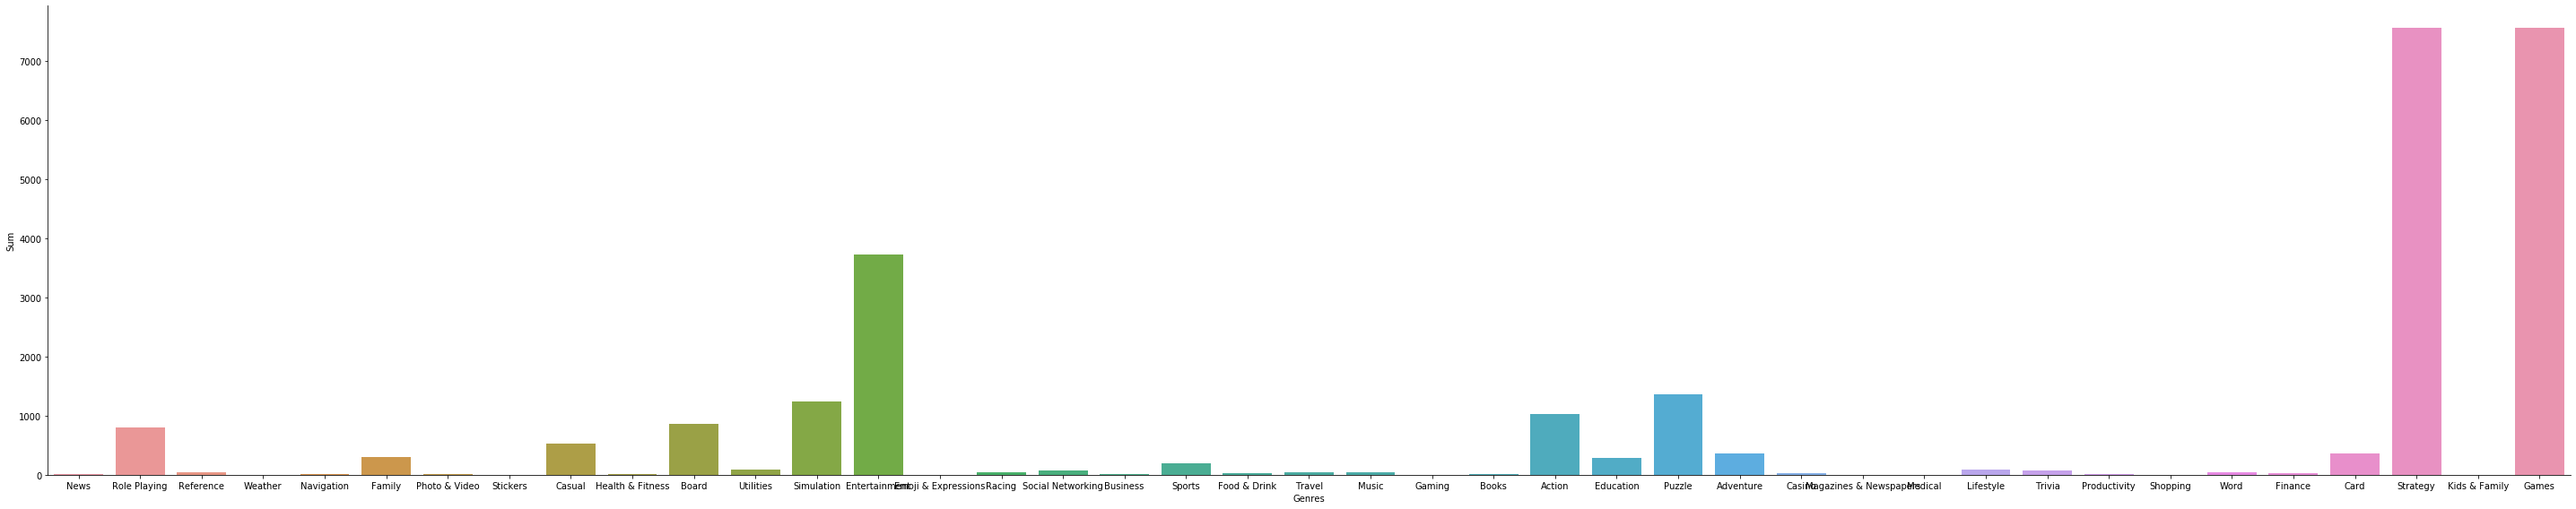

In [127]:
k = pd.DataFrame({"Genres": genres_dataframe.sum().index, "Sum": genres_dataframe.sum().values})
sns.catplot(x = "Genres", y = "Sum", data = k, kind="bar", height = 8, aspect = 5)

**Plotting without Games, Strategy, Entertainment to see the plot clearly**

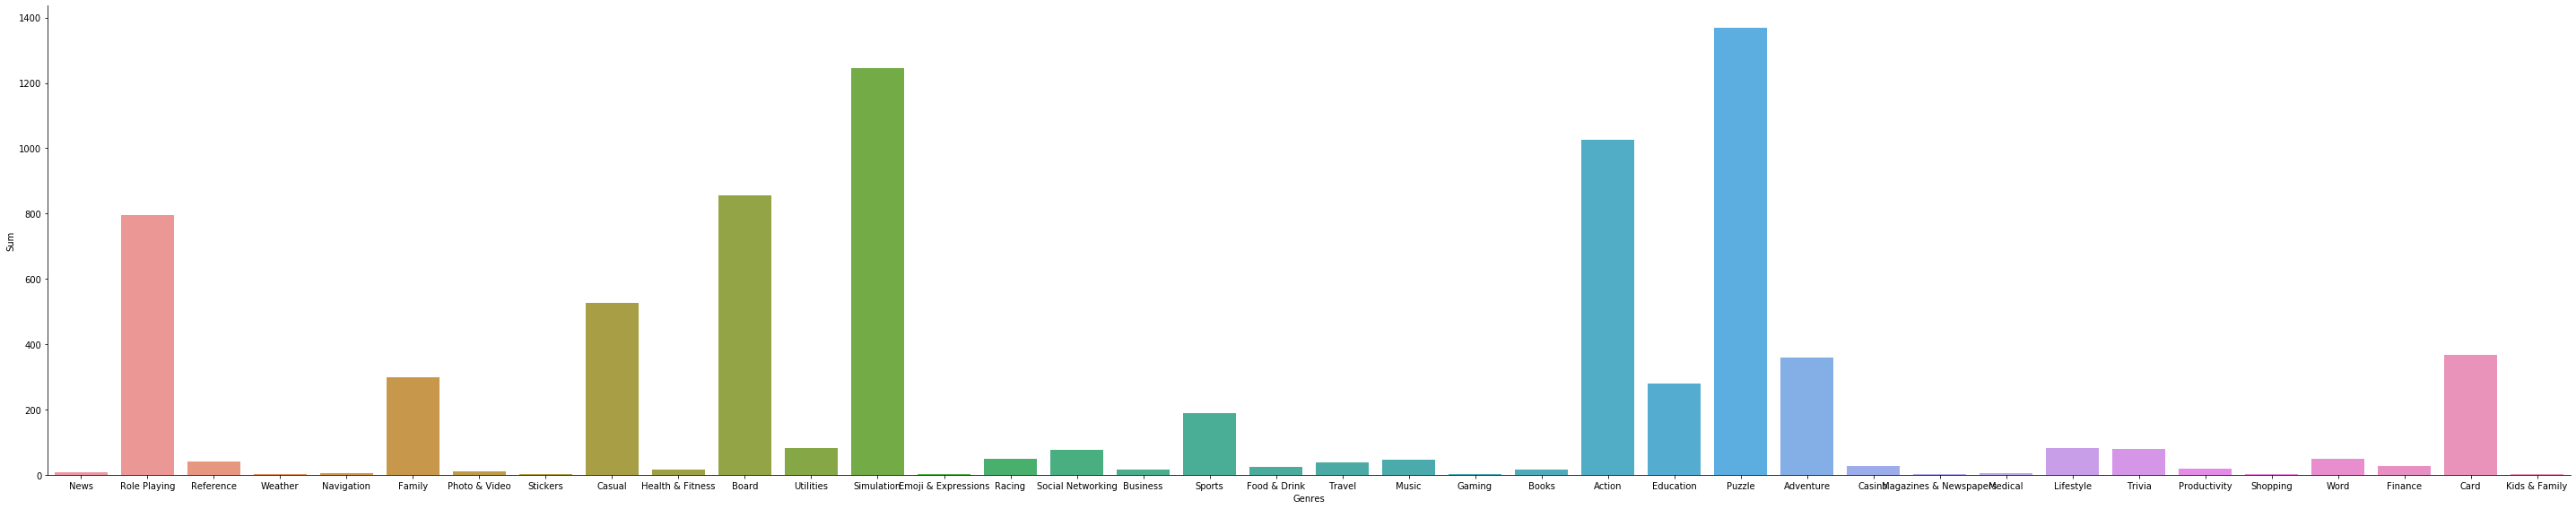

In [128]:
sns.catplot(x = "Genres", y = "Sum", data = k.loc[(k["Genres"] != "Games") & (k["Genres"] != "Strategy") & (k["Genres"] != "Entertainment")], kind="bar", height = 8, aspect = 5)

**Removing Primary Genre from sub-genre to get a better picture of sub-genre plot**

In [0]:
sub_genre_only = k[[(x not in dataset["Primary Genre"].unique()) for x in k["Genres"]]]

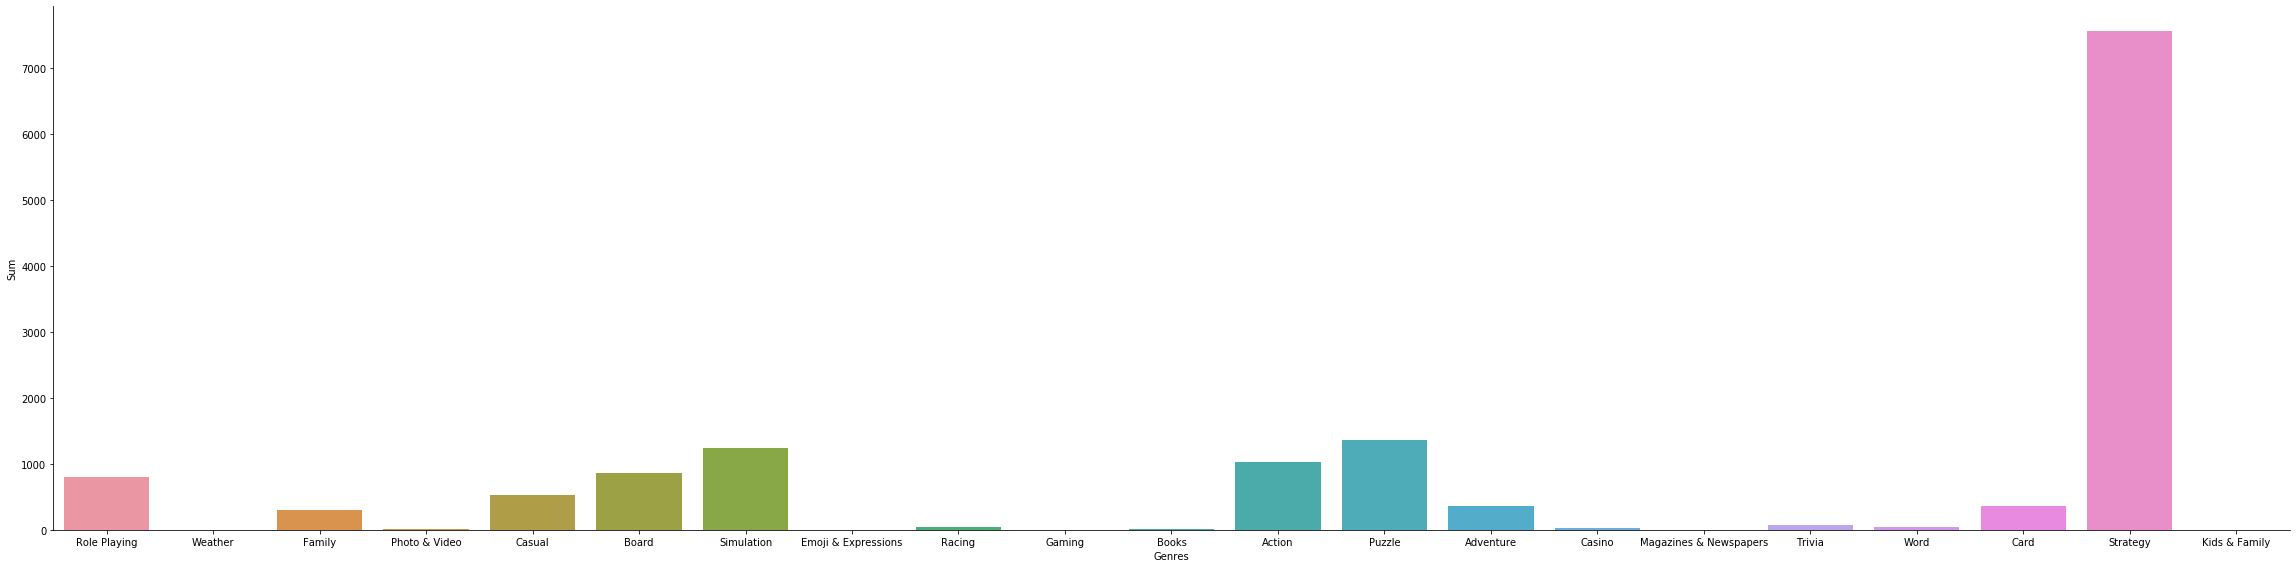

In [130]:
sns.catplot(x = "Genres", y = "Sum", data = sub_genre_only, kind = "bar", height = 8, aspect = 4)

**Removing Strategy sub-gen to get a better picture of rest of the sub-genre plot**

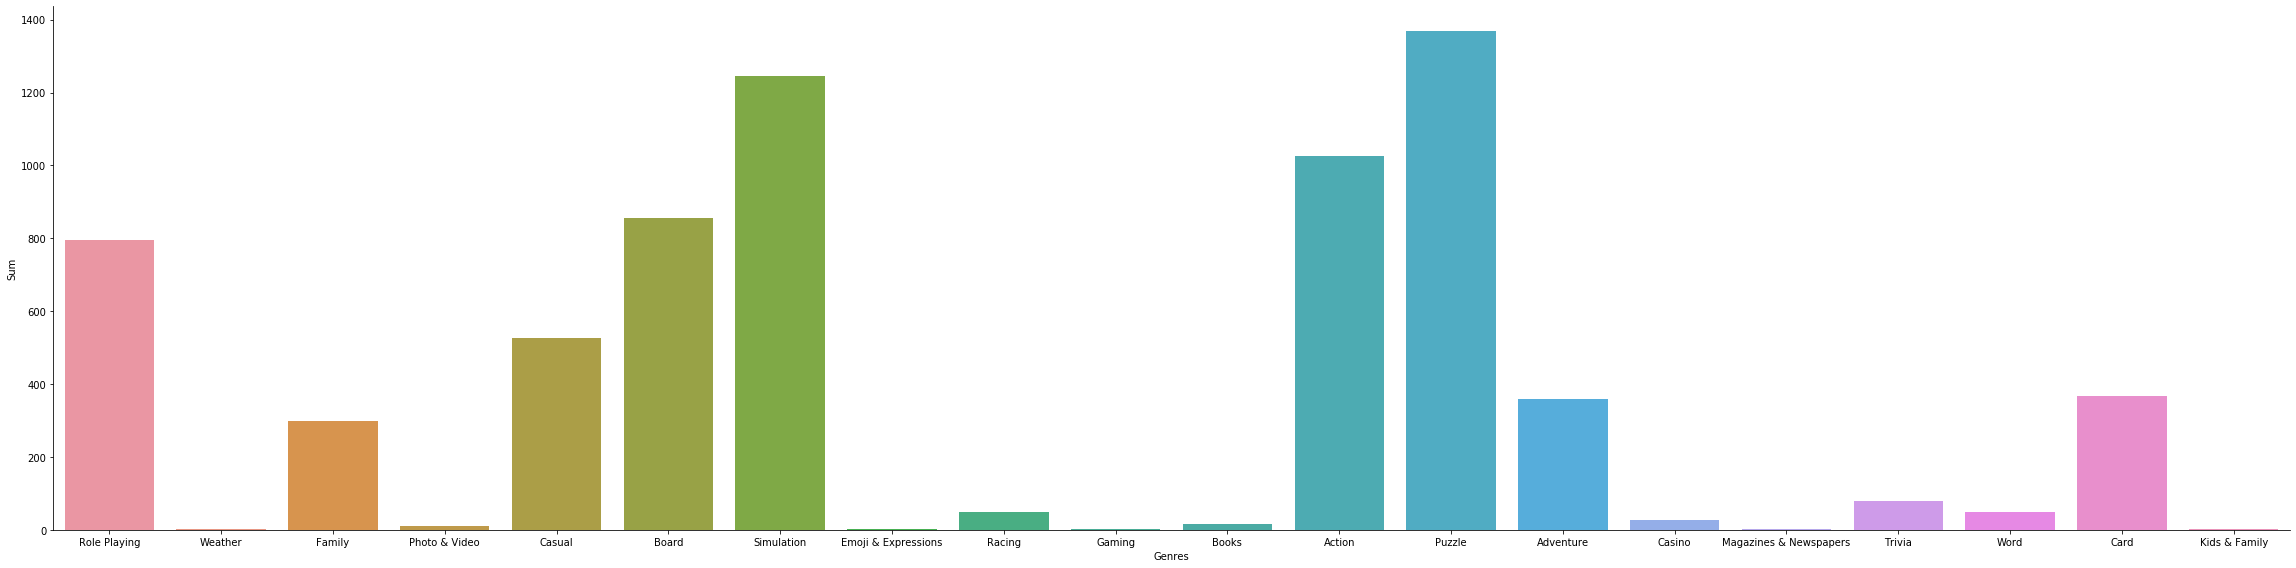

In [131]:
sns.catplot(x = "Genres", y = "Sum", data = sub_genre_only[sub_genre_only["Genres"] != "Strategy"], kind = "bar", height = 8, aspect = 4)

**In Conclusion: "Games" has the highest number of entries in the primary genre by far. "strategy" is the clear winner in the sub-genre, followed by "puzzle", "simulation" and "action".**

**Using boxplot to analyze the average user rating distribution based on Primary Genre**

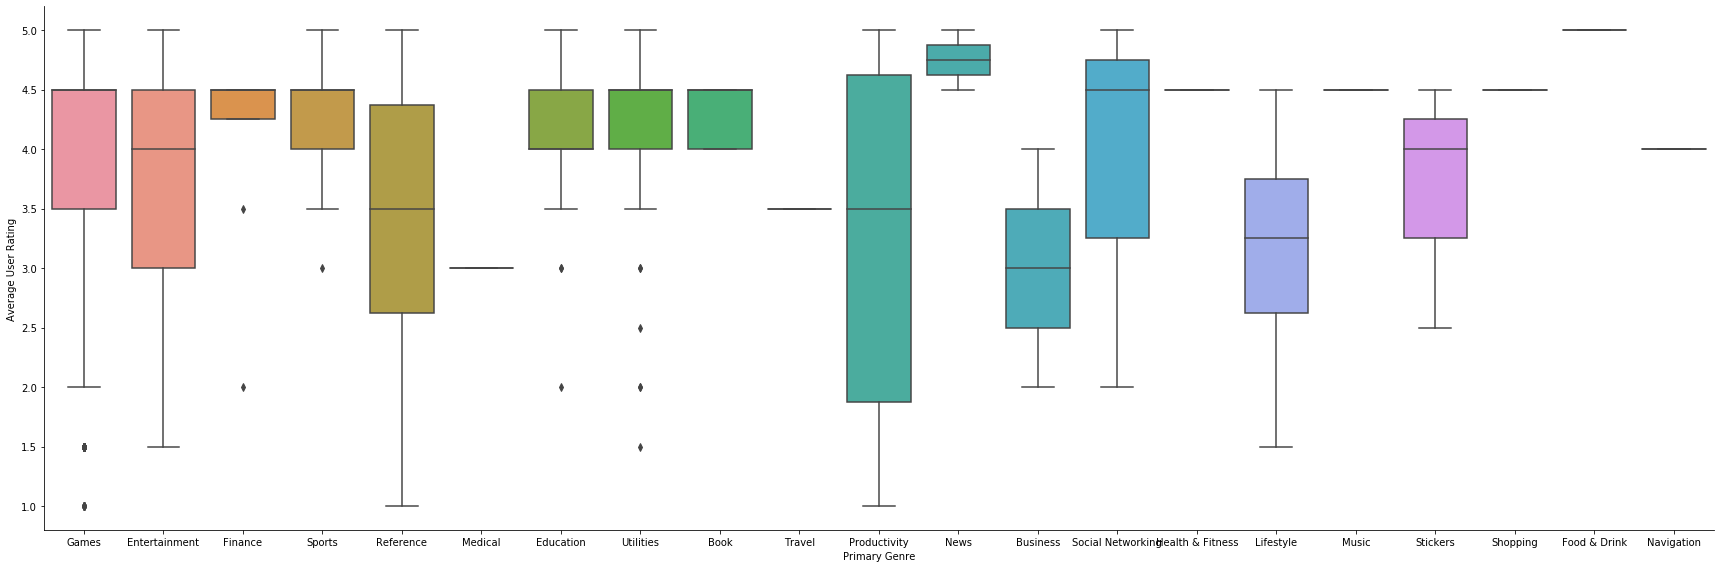

In [132]:
sns.catplot(x="Primary Genre", y="Average User Rating", data = dataset, kind = "box", height = 8, aspect = 3)

**Removing the Useless Genres (Genres with entries < 4)**

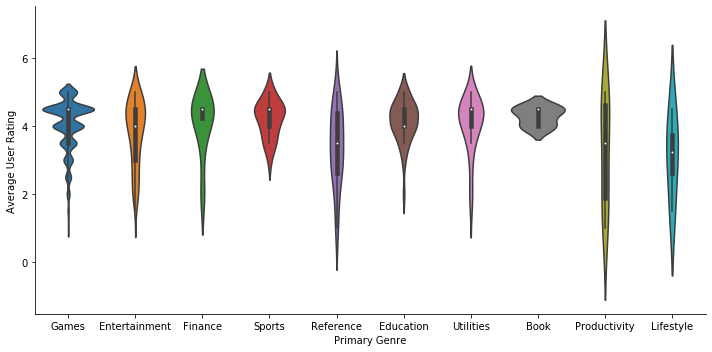

In [133]:
useful_genre = []
for i,x in enumerate(dataset["Primary Genre"].value_counts()):
  if x >= 4:
    useful_genre.append(dataset["Primary Genre"].value_counts().index[i])
sns.catplot(x="Primary Genre", y="Average User Rating", data = dataset[[(x in useful_genre) for x in dataset["Primary Genre"]]], kind = "violin", height = 5, aspect = 2)

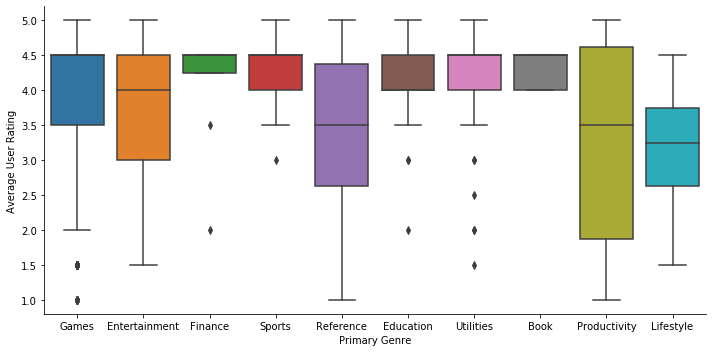

In [134]:
sns.catplot(x="Primary Genre", y="Average User Rating", data = dataset.loc[[(x in useful_genre) for x in dataset["Primary Genre"]]], kind = "box", height = 5, aspect = 2)

**Analyzing the Distribution of Average User Rating based on sub-genre**

In [135]:
sub_gen_rating = []
for index_row in range(dataset.shape[0]):
  for index_col in range(genres_dataframe.shape[1]):
    if genres_dataframe.iloc[index_row][index_col] == 1:
      sub_gen_rating.append([dataset.iloc[index_row][2], genres_dataframe.columns[index_col]])

sub_gen_rating = np.array(sub_gen_rating)
print(sub_gen_rating)

[['4.0' 'Puzzle']
 ['4.0' 'Strategy']
 ['4.0' 'Games']
 ...
 ['5.0' 'Utilities']
 ['5.0' 'Strategy']
 ['5.0' 'Games']]


In [136]:
sub_gen_rating_dataframe = pd.DataFrame({"Average User Rating": sub_gen_rating[:,0], "Sub Genre": sub_gen_rating[:,1]})
sub_gen_rating_dataframe["Average User Rating"] = sub_gen_rating_dataframe["Average User Rating"].astype("float")
sub_gen_rating_dataframe

,Average User Rating,Sub Genre
0,4.0,Puzzle
1,4.0,Strategy
2,4.0,Games
3,3.5,Board
4,3.5,Strategy
...,...,...
26875,5.0,Games
26876,5.0,Board
26877,5.0,Utilities
26878,5.0,Strategy


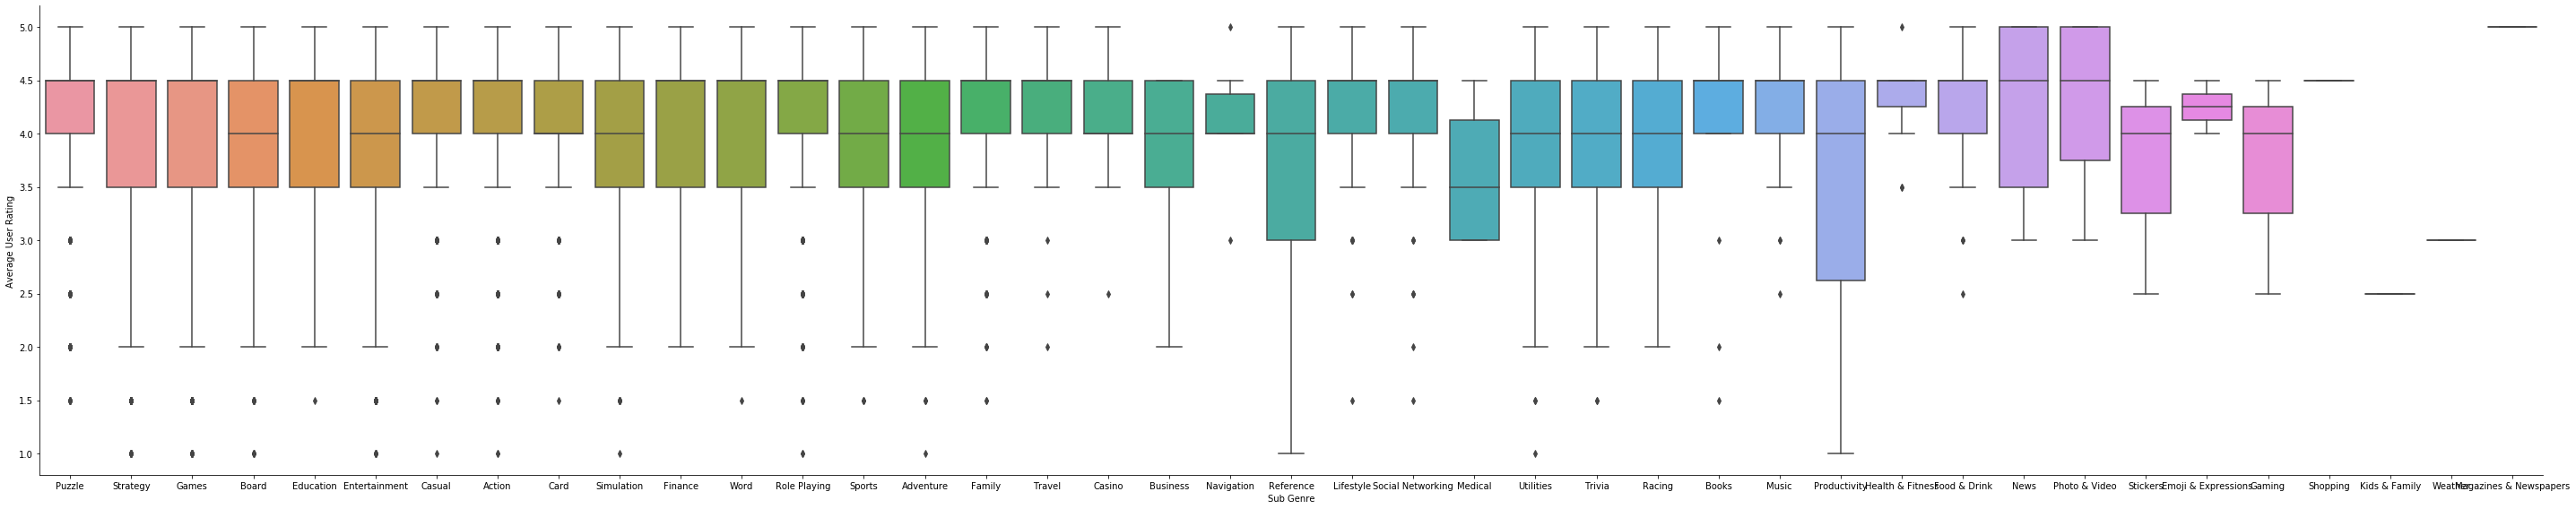

In [137]:
sns.catplot(x = "Sub Genre", y = "Average User Rating", data = sub_gen_rating_dataframe, kind = "box", height = 8, aspect = 5)

**Removing useless sub-genres(sub-genre entries <10)**

In [138]:
useful_sub_genre = []
for i,x in enumerate(genres_dataframe.sum()):
  if x >= 10:
    useful_sub_genre.append(genres_dataframe.sum().index[i])
print(useful_sub_genre)

['Role Playing', 'Reference', 'Family', 'Photo & Video', 'Casual', 'Health & Fitness', 'Board', 'Utilities', 'Simulation', 'Entertainment', 'Racing', 'Social Networking', 'Business', 'Sports', 'Food & Drink', 'Travel', 'Music', 'Books', 'Action', 'Education', 'Puzzle', 'Adventure', 'Casino', 'Lifestyle', 'Trivia', 'Productivity', 'Word', 'Finance', 'Card', 'Strategy', 'Games']


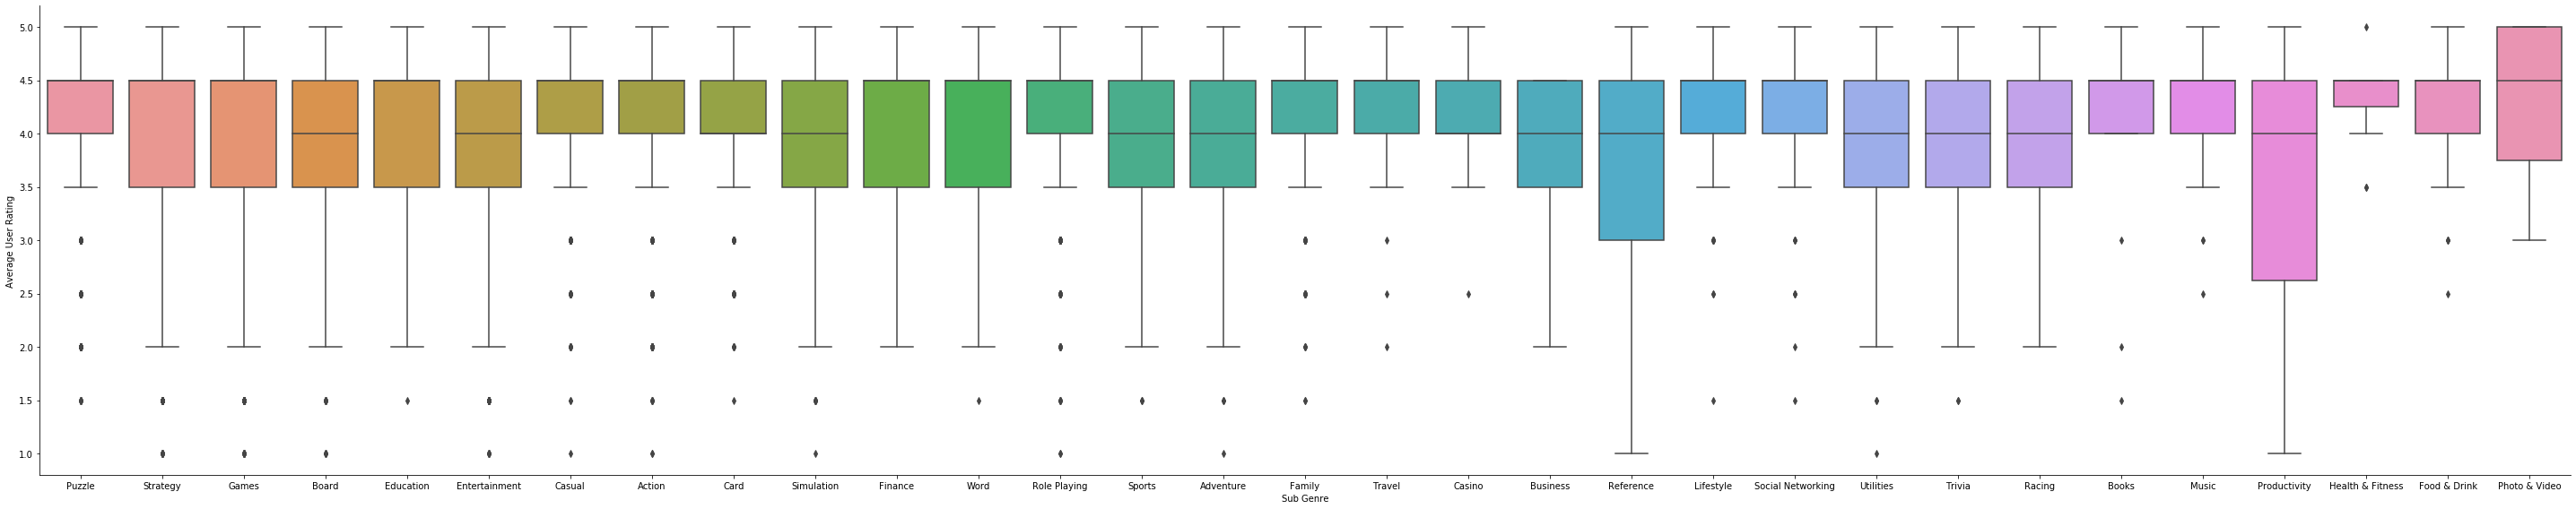

In [139]:
sns.catplot(x = "Sub Genre", y = "Average User Rating", data = sub_gen_rating_dataframe.loc[[(x in useful_sub_genre) for x in sub_gen_rating_dataframe["Sub Genre"]]], kind = "box", height = 8, aspect = 5)

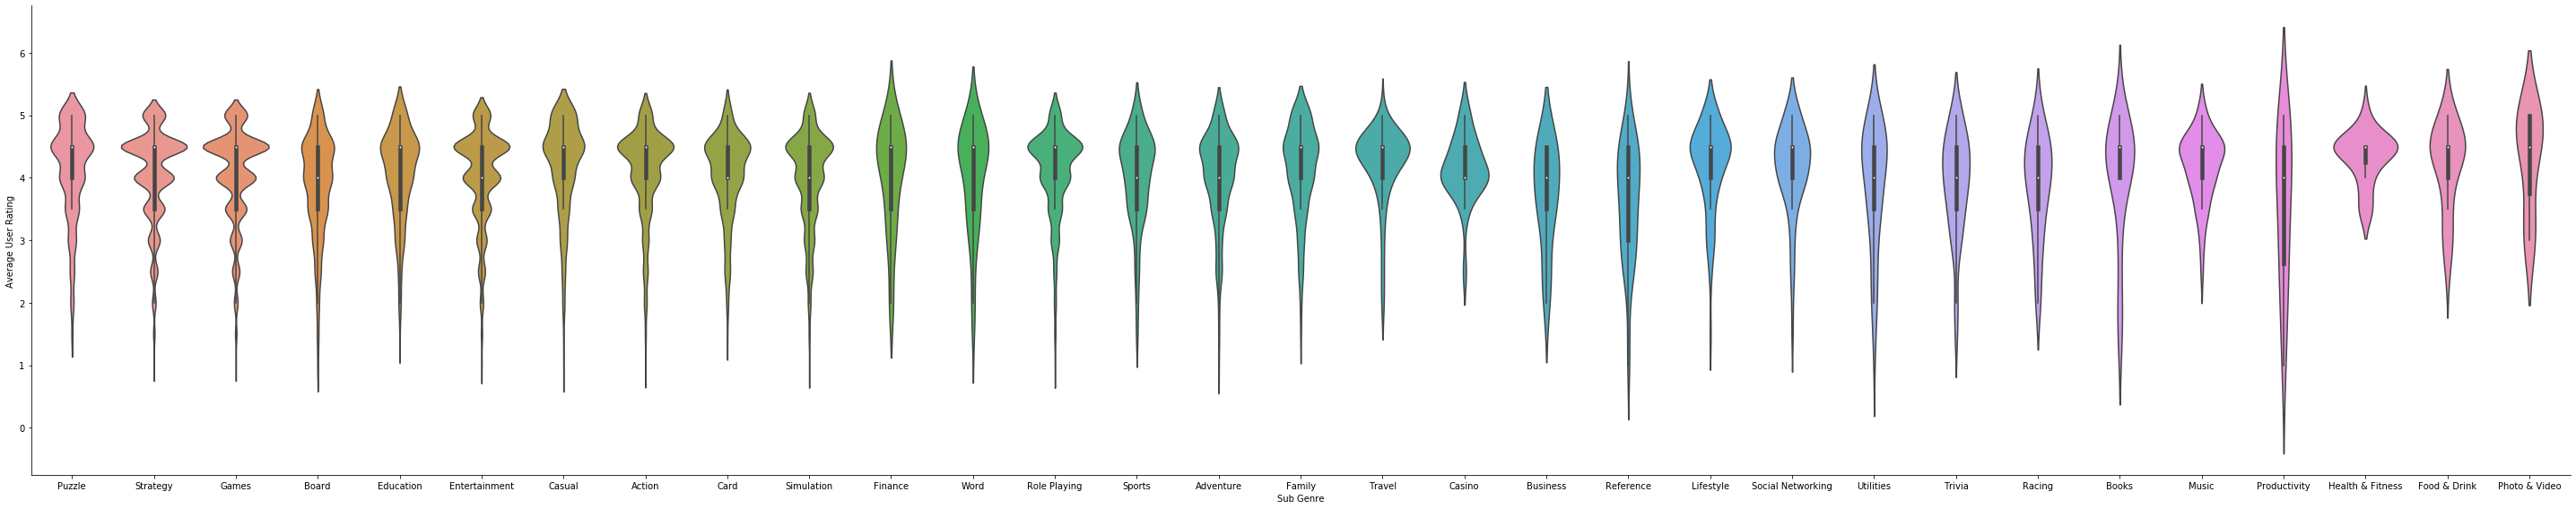

In [140]:
sns.catplot(x="Sub Genre", y="Average User Rating", data = sub_gen_rating_dataframe.loc[[(x in useful_sub_genre) for x in sub_gen_rating_dataframe["Sub Genre"]]], kind = "violin", height = 8, aspect = 5)

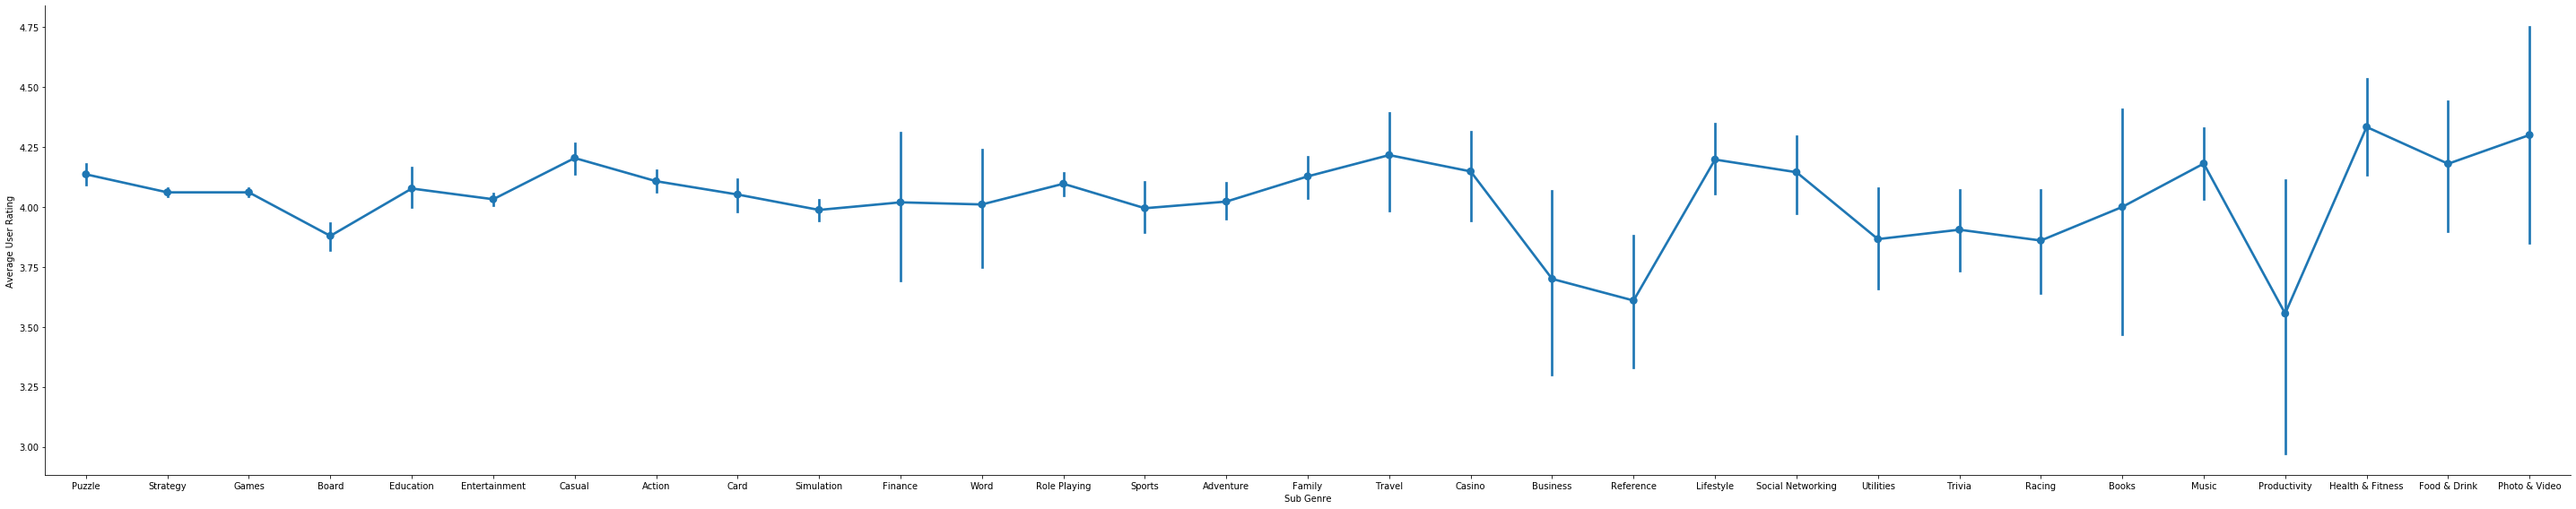

In [144]:
sns.catplot(x="Sub Genre", y="Average User Rating", data = sub_gen_rating_dataframe.loc[[(x in useful_sub_genre) for x in sub_gen_rating_dataframe["Sub Genre"]]], kind = "point", height = 8, aspect = 5)

**In Conclusion: Average user rating of all the genres and sub-genres are pretty much same, with puzzle, strategy, casual, and action games having good ratings ratings, boards and racing games having below average ratings and refrence, bussiness, productivity and lifestyle having worst ratings**

**Analyzing the trend of user rating based on pricing**

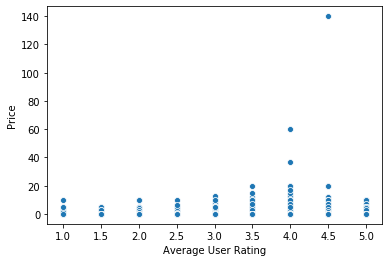

In [141]:
sns.scatterplot(x = "Average User Rating", y = "Price", data = dataset)

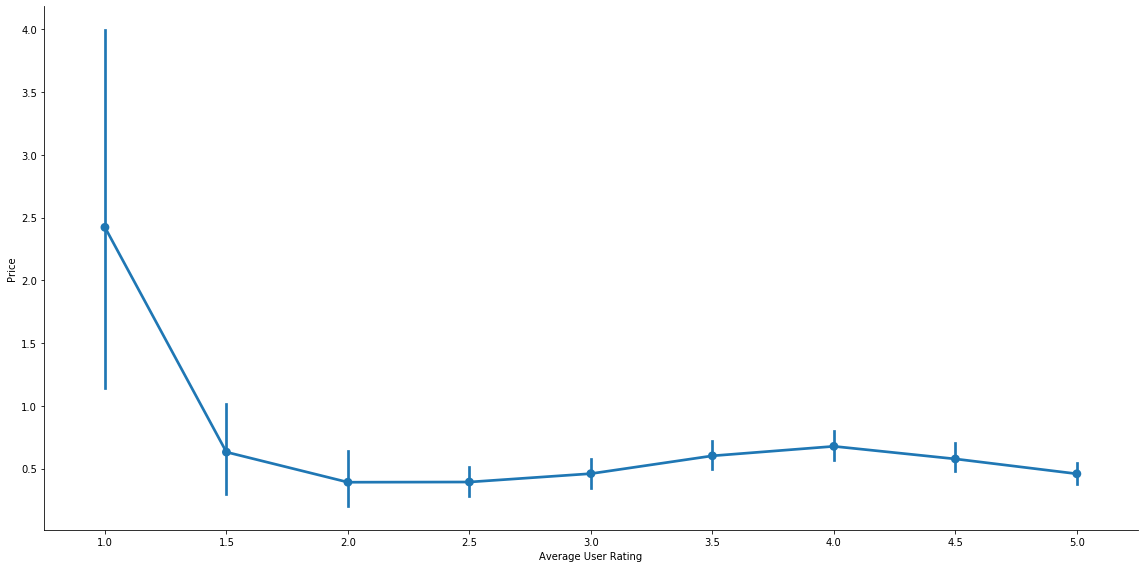

In [142]:
g = sns.catplot(x = "Average User Rating", y = "Price", data = dataset, kind="point", height = 8, aspect = 2)

**As clear from the graph above, safest bet for the price tag for an app is around 50 cents to 1$**

**In Conclusion: Game should be of sub-genre "strategy", "puzzle", "casual" or "action" and should be priced around 50 cents to 1$ to get the ratings between 4.0 and 5.0**